# Demo

The `pymultifracs` package allows us to perform fractal and multifractal analysis of signals

In [1]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context('notebook')
figure_folder = 'figures/expl/'

## Load a real signal

Let's load a signal from a real, preprocessed MEG recording

In [4]:
from mne.io import read_raw_fif
import json

In [5]:
with open('/neurospin/meg/meg_tmp/ScaledTime_Dragana_2019/MEG/pl170230/pl170230_timings.json', 'r') as f:
    timings = json.load(f)['Run06']

FileNotFoundError: [Errno 2] No such file or directory: '/neurospin/meg/meg_tmp/ScaledTime_Dragana_2019/MEG/pl170230/pl170230_timings.json'

In [9]:
timings

{'t1': [233.063, 252.1485],
 'p1': [255.7925, 328.216],
 'r1': [332.772, 406.3105],
 't2': [8.0405, 28.364],
 'p2': [31.7215, 126.565],
 'r2': [129.78, 225.08],
 't3': [421.9765, 449.9715],
 'p3': [453.2175, 601.519],
 'r3': [601.6525, 746.797]}

In [10]:
Raw = read_raw_fif('/neurospin/meg/meg_tmp/ScaledTime_Dragana_2019/MEG/pl170230/pl170230_ScaledTime_Run06_filtered_ica-r_sss_raw.fif')

Opening raw data file /neurospin/meg/meg_tmp/ScaledTime_Dragana_2019/MEG/pl170230/pl170230_ScaledTime_Run06_filtered_ica-r_sss_raw.fif...
    Range : 30000 ... 1538999 =     15.000 ...   769.500 secs
Ready.


In [11]:
Raw.crop(*timings['p1'])

<Raw | pl170230_ScaledTime_Run06_filtered_ica-r_sss_raw.fif, 340 x 144848 (72.4 s), ~7.5 MB, data not loaded>

In [12]:
Raw.load_data()

Reading 0 ... 144847  =      0.000 ...    72.424 secs...


<Raw | pl170230_ScaledTime_Run06_filtered_ica-r_sss_raw.fif, 340 x 144848 (72.4 s), ~383.2 MB, data loaded>

In [13]:
Raw.info['ch_names'][35]

'MEG0341'

In [14]:
X = Raw[35, :][0][0]

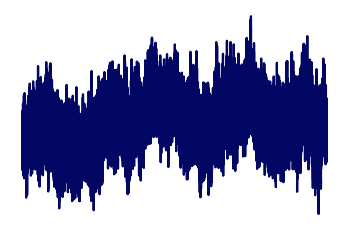

In [15]:
plt.plot(X, c='xkcd:darkblue')
sns.despine()
# plt.title('')
# plt.ylabel('X')
# plt.xlabel('t')
plt.savefig(figure_folder + 'signal.pdf')
plt.axis('off')
plt.show()

In [51]:
import numpy as np

In [53]:
np.save('signal.npy', X)

## PSD

In [55]:
import pymultifracs.psd as psd

fs = 2000

In [59]:
sns.set_style('whitegrid')

(-85.0, -70.0)

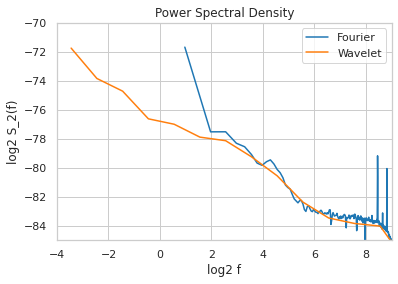

In [61]:
psd.plot_psd(X, fs, n_fft=1024)
plt.xlim((-4, 9))
plt.ylim((-85, -70))

In [62]:
from pymultifracs.estimation import estimate_hmin

In [63]:
from pymultifracs.wavelet import wavelet_analysis

In [118]:
WT = wavelet_analysis(X, j1=10, j2=14, p_exp=2)

/home/md262764/Multifracs/pymultifracs/pymultifracs/wavelet.py:52: UserWarning: eta(p) = [-0.01066376] <= 0, p-Leaders correction was not                        applied. A smaller value of p (or larger value of                        gamint) should be selected.
  warnings.warn(f"eta(p) = {eta_p} <= 0, p-Leaders correction was not\


In [73]:
estimate_hmin(WT.wt_coefs, 10, WT.j2_eff, weighted=True)

(array([-0.20479475]), array([-39.71855077]))

In [116]:
WT.wt_coefs.values[1][~np.isnan(WT.wt_coefs.values[1])]

array([ 6.86895186e-14, -4.71026950e-14,  3.38020824e-14, ...,
       -4.44623632e-14,  5.33728458e-14,  3.67355941e-15])

In [119]:
WT.wt_leaders

MultiResolutionQuantity(formalism='wavelet p-leader', gamint=0.0, nj={1: array([72421]), 2: array([36210]), 3: array([18104]), 4: array([9051]), 5: array([4524]), 6: array([2261]), 7: array([1129]), 8: array([563]), 9: array([280]), 10: array([139]), 11: array([68]), 12: array([33]), 13: array([15]), 14: array([6])}, nrep=1, values={1: array([[6.86895186e-14],
       [8.32881375e-14],
       [8.98860090e-14],
       ...,
       [5.34991187e-14],
       [3.67355941e-15],
       [           nan]]), 2: array([[1.36952184e-13],
       [1.63579261e-13],
       [1.99854202e-13],
       ...,
       [3.77163276e-13],
       [3.05305049e-13],
       [4.91887052e-14]]), 3: array([[2.44293439e-13],
       [3.31084227e-13],
       [3.72190886e-13],
       ...,
       [2.70087488e-13],
       [2.96812869e-13],
       [2.75391843e-13]]), 4: array([[3.03576399e-13],
       [3.52723197e-13],
       [3.27391517e-13],
       ...,
       [2.82582603e-13],
       [2.84783909e-13],
       [2.53020312e-13]]

**Using p-leaders**

In [66]:
from megfractal.utils import freq2scale, scale2freq

In [33]:
def scale2freq(scale, sfreq):
    return (3/4) * sfreq * (2 ** -scale)

def freq2scale(freq, sfreq):
    return - 2 - np.log2(freq / (3 * sfreq))

In [94]:
fs = 256

In [99]:
scale2freq(7, fs)

1.5

In [99]:
scale2freq(7, fs)

1.5

In [101]:
np.log2(120 * 256)

14.906890595608518

In [100]:
freq2scale(1, fs)

7.584962500721156

In [22]:
import pymultifracs.mfa as mfa

In [23]:
from pymultifracs.utils import build_q_log

In [102]:
dwt, lwt = mfa.mf_analysis_full(X,
    j1=8, j2=14,
    q = build_q_log(1, 10, 20),
    n_cumul=2,
    p_exp=2,
    gamint=0.5,
    weighted=False
)

In [103]:
dwt.hmin

array([0.34646065])

The `lwt` variable shares the same structure as `dwt`

In [104]:
lwt_sf, lwt_cumul, lwt_mfs, hmin = lwt

The `lwt_sf`, `lwt_cumul`, `lwt_mfs` variables defined here share the same structure as the `sf`, `cumul`, and `mfs` variables defined previously

**structure functions**

In [105]:
dwt.structure.H

array([0.48796621])

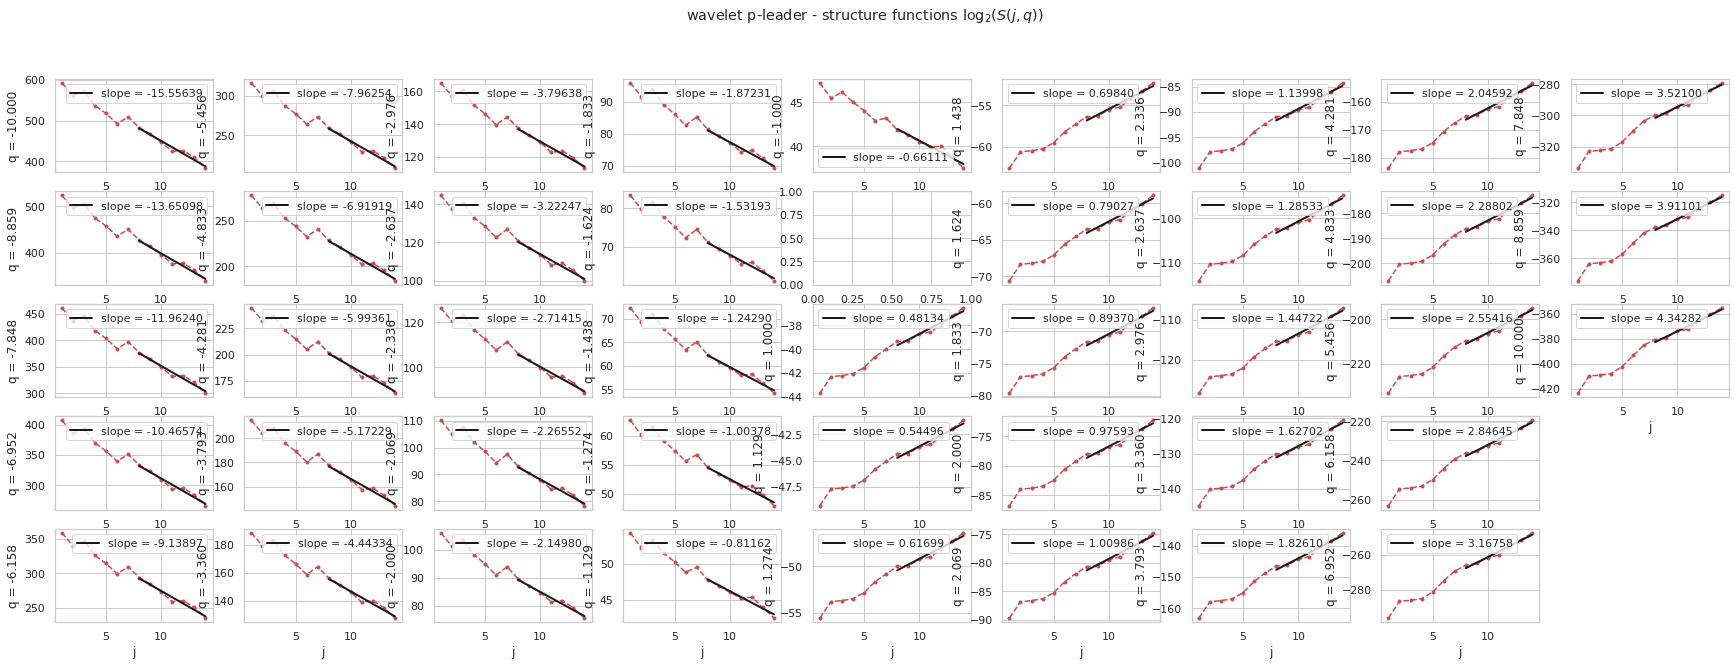

In [106]:
dwt.structure.plot(nrow=5)

**cumulants**

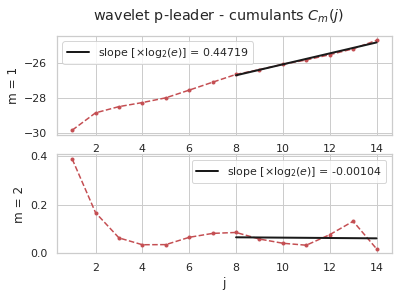

In [107]:
lwt_cumul.plot(nrow=3)

In [108]:
lwt_cumul.log_cumulants

array([[ 0.447192  ],
       [-0.00104328]])

**multifractal spectrum**

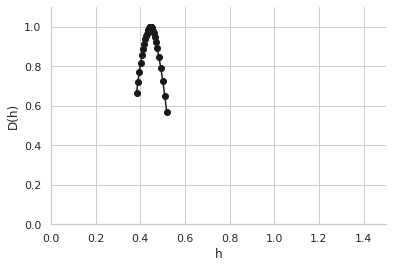

In [109]:
lwt_mfs.plot()
sns.despine()
plt.suptitle('')
plt.ylim((0, 1.1))
plt.xlim((0, 1.5))
plt.savefig(figure_folder + 'mfs.pdf')

In [40]:
dwt, lwt = mfa.mf_analysis_full(X,
    j1=8, j2=14,
    q = [2],
    n_cumul=2,
    p_exp=2,
    gamint=1.0,
    weighted=False
)

In [45]:
dwt.structure.H

array([0.98796621])

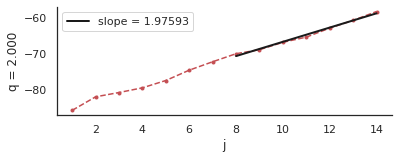

In [43]:
dwt.structure.plot(figsize=(6, 2))
plt.suptitle('')
sns.despine()

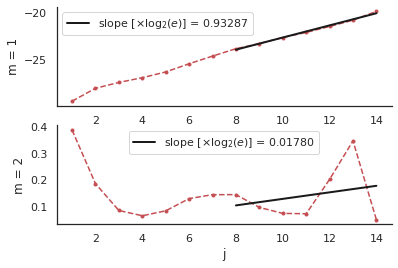

In [47]:
lwt.cumulants.plot(nrow=3)
plt.suptitle('')
sns.despine()